# Intro to AI Homework #1
1. Select your own data (One for classification, one for regression, and one for k-means unsupervised learning)
2. Upload the data to your own public github repo, make it downloadable.
3. Do classification, regression, unsupervised learning.
4. Write some analysis for each results with markdown format.

In [1]:
import requests
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
torch.manual_seed(42)
np.random.seed(42)

def download_file(url, filename):
    response = requests.get(url)
    response.raise_for_status()
    with open(filename, 'wb') as f:
        f.write(response.content)
    return filename

classification_url = "https://github.com/cho104/PNU-IAI-2025/raw/refs/heads/main/mnist.tar.bz2"
regression_url = "https://github.com/cho104/PNU-IAI-2025/raw/refs/heads/main/train.csv"
kmeans_url = "https://github.com/cho104/PNU-IAI-2025/raw/refs/heads/main/Online%20Retail.xlsx"

classification_path = download_file(classification_url, "mnist.tar.bz2")
! tar -xf mnist.tar.bz2
classification_path = "mnist"
regression_path = download_file(regression_url, "bike_train.csv")
kmeans_path = download_file(kmeans_url, "Online_Retail.xlsx")

Streaming output truncated to the last 5000 lines.
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.provenance'
tar

# Classification : MNIST
* Dataset description: The MNIST database of handwritten digits has a training set of 60k examples, and a test set of 10k examples.

Model: MLP_1
# of Parameters: 485386

Training MLP_1
Epoch 1/50 | val_loss: 0.1709 | val_acc: 0.9488
Epoch 2/50 | val_loss: 0.1185 | val_acc: 0.9652
Epoch 3/50 | val_loss: 0.0887 | val_acc: 0.9738
Epoch 4/50 | val_loss: 0.0837 | val_acc: 0.9753
Epoch 5/50 | val_loss: 0.0836 | val_acc: 0.9735
Epoch 6/50 | val_loss: 0.0861 | val_acc: 0.9737
Epoch 7/50 | val_loss: 0.0846 | val_acc: 0.9770
Epoch 8/50 | val_loss: 0.0871 | val_acc: 0.9769
Epoch 9/50 | val_loss: 0.0884 | val_acc: 0.9762
Epoch 10/50 | val_loss: 0.0968 | val_acc: 0.9754
Epoch 11/50 | val_loss: 0.1038 | val_acc: 0.9758
Epoch 12/50 | val_loss: 0.0922 | val_acc: 0.9762
Epoch 13/50 | val_loss: 0.0863 | val_acc: 0.9794
Epoch 14/50 | val_loss: 0.0965 | val_acc: 0.9788
Epoch 15/50 | val_loss: 0.1138 | val_acc: 0.9751
Epoch 16/50 | val_loss: 0.1225 | val_acc: 0.9743
Epoch 17/50 | val_loss: 0.0882 | val_acc: 0.9799
Epoch 18/50 | val_loss: 0.1253 | val_acc: 0.9752
Epoch 19/50 | val_loss: 0.1041 | val_acc: 0.9778
Epoch 20/50 | val_loss: 0

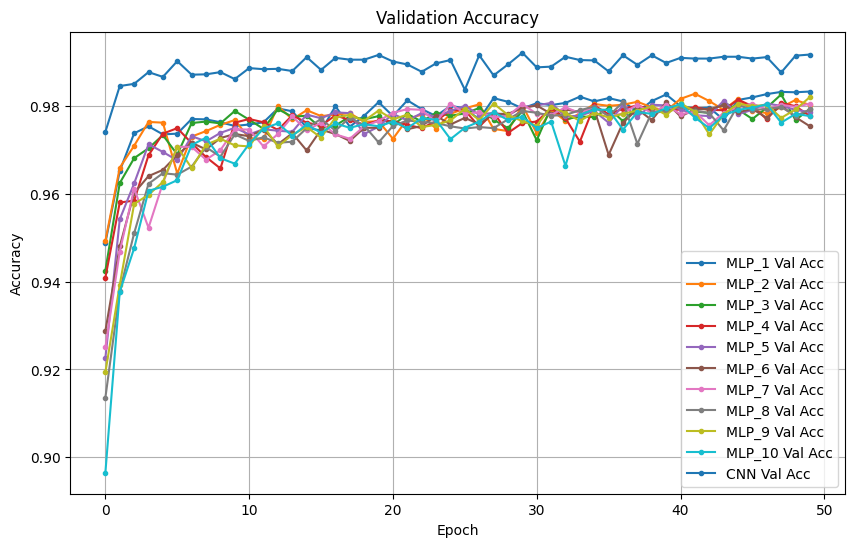


--------------------
[MLP_1]
Test Loss: 0.1077
Test Acc:  0.9839
--------------------
[MLP_2]
Test Loss: 0.1085
Test Acc:  0.9819
--------------------
[MLP_3]
Test Loss: 0.1075
Test Acc:  0.9832
--------------------
[MLP_4]
Test Loss: 0.1286
Test Acc:  0.9790
--------------------
[MLP_5]
Test Loss: 0.1624
Test Acc:  0.9784
--------------------
[MLP_6]
Test Loss: 0.1835
Test Acc:  0.9768
--------------------
[MLP_7]
Test Loss: 0.1580
Test Acc:  0.9800
--------------------
[MLP_8]
Test Loss: 0.1660
Test Acc:  0.9772
--------------------
[MLP_9]
Test Loss: 0.1606
Test Acc:  0.9822
--------------------
[MLP_10]
Test Loss: 0.1286
Test Acc:  0.9784
--------------------
[CNN]
Test Loss: 0.0433
Test Acc:  0.9927


In [4]:
# Dataloader
def img_to_df(root_dir):
    data = []
    for label in range(10):
        folder_path = os.path.join(root_dir, str(label))
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for img_path in image_files:
            img = Image.open(img_path).convert('L').resize((28, 28))
            arr = np.array(img).flatten().astype(np.float32) / 255.0
            data.append(np.append(arr, label))
    df = pd.DataFrame(data)
    df.rename(columns={df.columns[-1]: 'label'}, inplace=True)
    return df

train_df = img_to_df('./mnist/training')
classification_test_df = img_to_df('./mnist/testing')
classification_train_df, classification_val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

class ClassificationDataset(Dataset):
    def __init__(self, df):
        self.X = torch.tensor(df.iloc[:, :-1].values, dtype=torch.float32)
        self.y = torch.tensor(df.iloc[:, -1].values, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ClassificationDataset(classification_train_df)
val_dataset = ClassificationDataset(classification_val_df)
test_dataset = ClassificationDataset(classification_test_df)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
num_classes = 10
device = torch.device("cuda")

# Model
class MLP(nn.Module):
    def __init__(self, layers=1):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fcs = nn.ModuleList([nn.Linear(128, 128) for i in range(layers)])
        self.fc_out = nn.Linear(128, 10)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        for i in self.fcs:
            out = i(out)
            out = self.relu(out)
        out = self.fc_out(out)
        return out

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5)
        self.relu = nn.ReLU(inplace=True)
        self.pooler = nn.MaxPool2d(kernel_size=3, stride=2)
        self.fc = nn.Linear(64 * 2 * 2, 256)
        self.fc_out = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.pooler(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.pooler(x)
        x = self.relu(x)
        x = x.flatten(1)
        x = self.fc(x)
        x = self.relu(x)
        x = self.fc_out(x)
        return x

# Train
def train_and_evaluate(model_name, model, epochs=20):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    val_acc_history = []
    print(f"\nTraining {model_name}")

    for epoch in range(epochs):
        model.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

        model.eval()
        correct, total = 0, 0
        loss_sum = 0
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                out = model(X)
                loss = criterion(out, y)
                loss_sum += loss.item()
                preds = out.argmax(dim=1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        val_acc = correct / total
        val_loss = loss_sum / len(val_loader)
        val_acc_history.append(val_acc)
        print(f"Epoch {epoch+1}/{epochs} | val_loss: {val_loss:.4f} | val_acc: {val_acc:.4f}")
    return val_acc_history, model

models = {f"MLP_{i}": MLP(i) for i in range(1, 11)}
models["CNN"] = CNN()

results = {}
trained_models = {}

for name, model in models.items():
    params = sum(p.numel() for p in model.parameters())
    print(f"Model: {name}")
    print(f"# of Parameters: {params}")
    hist, trained_model = train_and_evaluate(name, model, epochs=50)
    results[name] = hist
    trained_models[name] = trained_model
    print()

plt.figure(figsize=(10, 6))
for name, hist in results.items():
    plt.plot(hist, label=f"{name} Val Acc", marker='.')

plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
print()

# Test
for name, model in trained_models.items():
    model.eval()
    correct, total = 0, 0
    loss_sum = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            out = model(X)
            loss_sum += nn.CrossEntropyLoss()(out, y).item()
            preds = out.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    test_loss = loss_sum / len(test_loader)
    test_acc = correct / total
    print("-" * 20)
    print(f"[{name}]")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Acc:  {test_acc:.4f}")

# Analysis for the classification
## Top-3
* CNN : 0.9927
* MLP_1 : 0.9839
* MLP_3 : 0.9832
## Comments
* MLP: 중간 레이어를 늘려가는 식으로 파라미터 수를 늘려가며 모든 모델이 converge 할때까지 훈련시키기 위해 50 에포크를 사용했다. 더 얕은 모델들이 깊은 모델에 비해 높은 성능을 보여주었다 (possibly overfitted on the train data).
* CNN: MLP 대비 적은 파라미터 수에도 불구하고 (MLP_1 : 0.48M, CNN : 0.14M) 이미지 데이터에서 구조적 우월성을 보여주었다.

# Regression : Bike Sharing Demand
* Data description: You are provided hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Train 6531 Val 2177 Test 2178
Training with SGD
Training with Adam
Training with RMSprop
Training with Adagrad
Training with AdamW



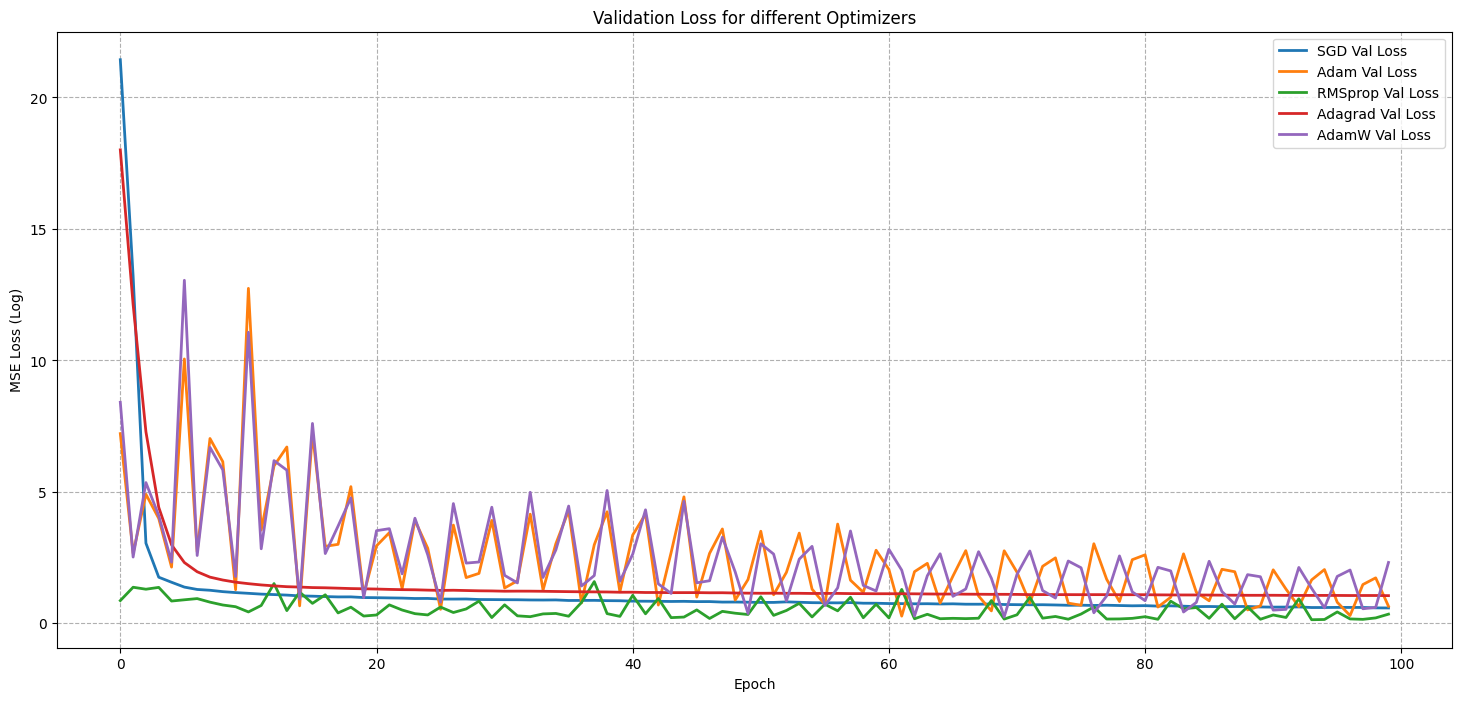


Strategy        | Test MSE        | Test RMSLE     
SGD             |         0.61479 |         0.78409
Adam            |         0.89441 |         0.94573
RMSprop         |         0.16734 |         0.40907
Adagrad         |         1.02640 |         1.01311
AdamW           |         0.95387 |         0.97666


In [10]:
# Preprocessing
df = pd.read_csv(regression_path)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek

def encode_cyclic(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

df = encode_cyclic(df, 'hour', 24)
df = encode_cyclic(df, 'month', 12)
df = encode_cyclic(df, 'dayofweek', 7)

df = pd.get_dummies(df, columns=['season', 'weather'], prefix=['season', 'weather'])
drop_cols = ['datetime', 'count', 'casual', 'registered', 'hour', 'month', 'dayofweek']
X_all = df.drop(columns=drop_cols).values.astype(np.float32)
y_all = np.log1p(df['count'].values).astype(np.float32).reshape(-1, 1)

# Split (based on time)
total_len = len(df)
train_len = int(total_len * 0.6)
val_len = int(total_len * 0.2)
test_len = total_len - train_len - val_len
y_train = y_all[:train_len]
y_val = y_all[train_len : train_len + val_len]
y_test = y_all[train_len + val_len :]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_all[:train_len])
X_val = scaler.transform(X_all[train_len : train_len + val_len])
X_test = scaler.transform(X_all[train_len + val_len :])

print(f"Train {len(X_train)} Val {len(X_val)} Test {len(X_test)}")

# Dataloader
class BikeDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(BikeDataset(X_train, y_train), batch_size=128, shuffle=False)
val_loader = DataLoader(BikeDataset(X_val, y_val), batch_size=128, shuffle=False)
test_loader = DataLoader(BikeDataset(X_test, y_test), batch_size=128, shuffle=False)

# Model
class BikeMLP(nn.Module):
    def __init__(self, input_dim):
        super(BikeMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Train
def train_model(opt_name, epochs=100):
    input_dim = X_train.shape[1]
    model = BikeMLP(input_dim)
    criterion = nn.MSELoss()
    optimizer = getattr(optim, opt_name)(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    print(f"Training with {opt_name}")
    for epoch in range(epochs):
        model.train()
        batch_losses = []
        for Xb, yb in train_loader:
            optimizer.zero_grad()
            pred = model(Xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())
        train_hist.append(np.mean(batch_losses))
        model.eval()
        val_losses = []
        with torch.no_grad():
            for Xb, yb in val_loader:
                pred = model(Xb)
                loss = criterion(pred, yb)
                val_losses.append(loss.item())
        epoch_val_loss = np.mean(val_losses)
        val_hist.append(epoch_val_loss)
    return model, train_hist, val_hist

strategies = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'AdamW']
trained_models = {}

plt.figure(figsize=(18, 8))

for strat in strategies:
    model, t_hist, v_hist = train_model(strat, epochs=100)
    trained_models[strat] = model
    plt.plot(v_hist, label=f'{strat} Val Loss', linewidth=2)

print()
plt.title("Validation Loss for different Optimizers")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (Log)")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

# Test
print()
print(f"{'Strategy':<15} | {'Test MSE':<15} | {'Test RMSLE':<15}")
for strat in strategies:
    model = trained_models[strat]
    model.eval()
    test_losses = []
    with torch.no_grad():
        for Xb, yb in test_loader:
            pred = model(Xb)
            loss = nn.MSELoss()(pred, yb)
            test_losses.append(loss.item())
    final_mse = np.mean(test_losses)
    final_rmse = np.sqrt(final_mse)
    print(f"{strat:<15} | {final_mse:15.5f} | {final_rmse:15.5f}")

# Analysis for the regression
## Top-3 w/ MSE
* RMSprop, 0.16734
* SGD, 0.61479
* Adam, 0.89441
## Comments
* SGD & Adagrad: 과적합이나 발산 없이 비교적 안정적으로 학습이 진행됨
* Adam & AdamW: minima에 안착하지 못하고 oscillation을 지속함, 학습 매커니즘과 연관된 행동인듯 함 (adaptive learning rate?)
* RMSprop: 초반 빠르게 loss가 감소함, 이후 다른 optimizer에 비해 높은 성능을 유지함

# Unsupervised Learning : Customer Segmentation
* Dataset description: A company that sells some of the product, and you want to know how well does the selling performance of the product. You have the data that can we analyze, but what kind of analysis that we can do? Well, we can segment customers based on their buying behavior on the market.

/tmp/ipython-input-1128796590.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


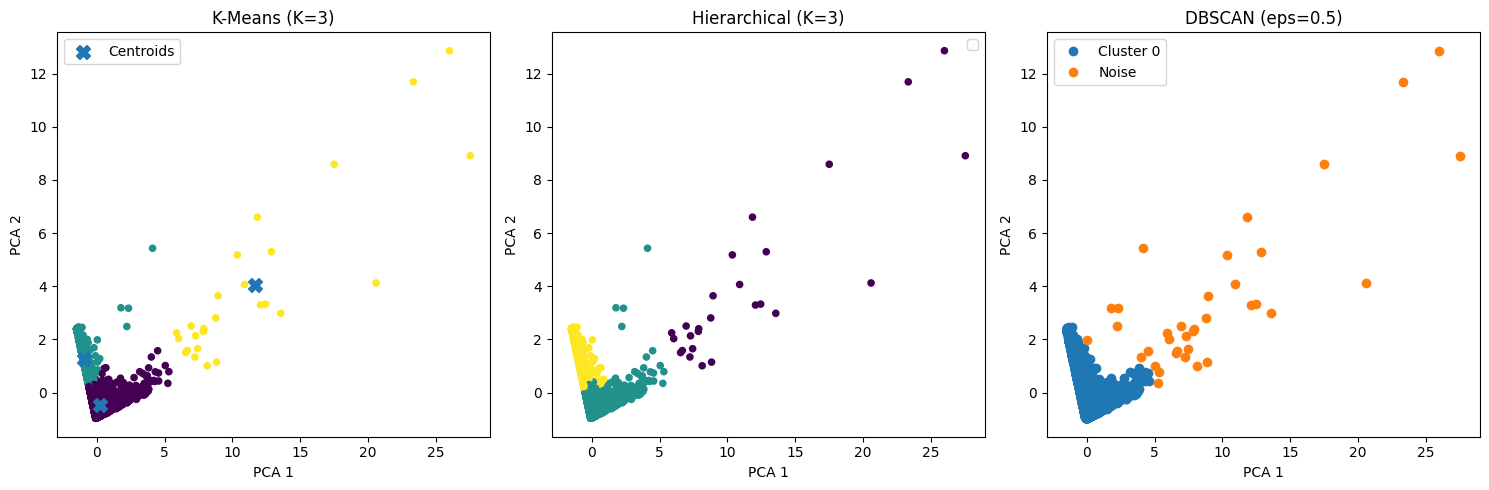

In [ ]:
# Load & cleansing & feature engineering
data = pd.read_excel(kmeans_path)
data = data.dropna(subset=['CustomerID'])
data = data[data['Quantity'] > 0]
data['CustomerID'] = data['CustomerID'].astype(int)
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
scaler = StandardScaler()
X_rfm = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# PCA 3D -> 2D
pca = PCA(n_components=2)
X = pca.fit_transform(X_rfm)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)

# Hierarchical
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_clust.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels_db = dbscan.fit_predict(X)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, marker='X', label='Centroids')
plt.title('K-Means (K=3)')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, s=20)
plt.title('Hierarchical (K=3)')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()

plt.subplot(1, 3, 3)
unique_labels = set(labels_db)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        label = "Noise"
    else:
        label = f"Cluster {k}"
    class_member_mask = (labels_db == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', label=label)

plt.title(f'DBSCAN (eps=0.5)')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.tight_layout()
plt.show()

# Analysis for the unsupervised learning

In [17]:
from IPython.display import Image
Image(url='https://dashee87.github.io/images/kmeans.gif')

In [16]:
Image(url='https://dashee87.github.io/images/hierarch.gif')

In [15]:
Image(url='https://dashee87.github.io/images/DBSCAN_tutorial.gif')

* DBSCAN: 데이터가 밀집된 V자 형태의 영역을 모두 하나의 거대한 그룹으로 묶고, 나머지 밀도가 희박한 외곽의 점들을 모두 노이즈로 처리 (가까운 점을 자동 클러스터링)
* K-Means & Hierarchical: 거의 동일한 군집화 결과를 보여줌, 고객 성향을 기준으로 고객 등급 나누기 등등 프로파일링에 사용 가능 (K-means는 centroid를 최적으로 배치하는 방법을 찾는 것 같고 ~intuitively~, Hierarchical clustering은 검색해보니 이름 그대로 가까운 distance를 가진 set을 차례로 더해가는 것 같다 ~til only k clusters left~.)

e.g.,
```
Cluster Profile (Mean)
            Recency  Frequency      Monetary
Cluster                                     
0         41.144986   4.682707   1859.140082
1        246.109890   1.578755    631.506008
2          6.038462  66.500000  85904.351538
# of Customers
Cluster
0    3221
1    1092
2      26
Name: count, dtype: int64
```
| Cluster | Recency (day) | Frequency (count) | Monetary ($ total) | # of Customers | Analysis |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 0 | 41.1 | 4.7 | 1,859 | 3,221 | 충성 고객, 정기적 구매, 전체 고객 대다수 차지 |
| 1 | 246.1 | 1.6 | 631 | 1,092 | 휴면 회원, 8개월 이상 구매 X, 구매 빈도와 지출액이 모두 낮음 |
| 2 | 6.0 | 66.5 | 85,904 | 26 | VIP 회원, 소수의 고객이지만 끊임없이 구매하며 막대한 금액을 지출 |


# References
https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

https://www.kaggle.com/code/oops26/e-retail-customer-segmentation-k-means#3.2.-Applying-K-Means-Clustering